In [30]:
#LBP（Local Binary Patterns，局部二值模式）提取纹理特征
from skimage import io
import numpy as np
img_path = r"C:\Users\MYZ\Desktop\ZHAOPIAN\Malignant (3820).png"
image = io.imread(img_path, as_gray=True)
from skimage.feature import local_binary_pattern
# 参数设置：
# radius - 邻域半径，即圆心到圆周上采样点的距离
# n_points - 邻域内采样点的数量（一般取为8、16、24等）
# method - LBP变种，如"uniform"（均匀模式）、"ror"（旋转不变模式）等
# 假设您已经使用 io.imread(img_path, as_gray=True) 读取了浮点数灰度图像，并将其赋值给变量 image

# 确定归一化范围
target_max = 255
# 归一化图像
normalized_image = (target_max * (image - image.min()) / (image.max() - image.min()))
# 转换为整数类型
image_int = normalized_image.astype(np.uint8)
# 计算 LBP 特征
radius = 3
n_points = 16
method = "uniform"
lbp_image = local_binary_pattern(image_int, n_points, radius, method)
lbp_image = lbp_image.astype(np.int64)
print(f"lbp_image type: {type(lbp_image)}")
print(f"lbp_image min, max: {lbp_image.min()}, {lbp_image.max()}") 
print(lbp_image.dtype)

lbp_image type: <class 'numpy.ndarray'>
lbp_image min, max: 0, 17
int64


In [31]:
from collections import Counter
# 获取LBP码字的最大值，用于确定直方图的 bins 数量
max_lbp_code = lbp_image.max()
#print(f"max_lbp_code: {max_lbp_code}")
# 统计LBP码字出现次数
lbp_histogram = Counter(lbp_image.flatten())
# 创建空直方图
lbp_histogram

Counter({17: 69730,
         8: 48015,
         9: 32564,
         7: 28842,
         10: 17055,
         6: 14663,
         11: 11360,
         5: 10963,
         0: 10150,
         16: 9365,
         12: 9352,
         4: 9199,
         13: 9170,
         3: 9116,
         2: 8718,
         14: 8667,
         1: 7752,
         15: 7319})

In [32]:
lbp_hist_array = np.zeros(max_lbp_code + 1)
# 填充直方图
for code, count in lbp_histogram.items():
   lbp_hist_array[code] = count
# 归一化直方图（可选，取决于后续应用的需求）
lbp_hist_array /= np.sum(lbp_hist_array)
lbp_hist_array  

array([0.03152174, 0.02407453, 0.02707453, 0.02831056, 0.02856832,
       0.03404658, 0.04553727, 0.08957143, 0.14911491, 0.10113043,
       0.05296584, 0.0352795 , 0.02904348, 0.02847826, 0.02691615,
       0.02272981, 0.02908385, 0.2165528 ])

In [6]:
import os
import numpy as np
from skimage import io
from skimage.feature import local_binary_pattern
from collections import Counter

def extract_lbp_features_as_matrix(folder_path, radius=3, n_points=16, method="uniform", target_max=255):
    lbp_histograms = []
    max_lbp_code = 0  # 初始化最大LBP码字

    # 遍历文件夹，计算每个图像的LBP特征并找到最长的直方图长度
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            image = io.imread(img_path, as_gray=True)

            normalized_image = (target_max * (image - image.min()) / (image.max() - image.min()))
            image_int = normalized_image.astype(np.uint8)

            lbp_image = local_binary_pattern(image_int, n_points, radius, method)
            lbp_image = lbp_image.astype(np.int64)

            max_lbp_code_temp = lbp_image.max()
            if max_lbp_code_temp > max_lbp_code:
                max_lbp_code = max_lbp_code_temp

    # 再次遍历文件夹，创建统一长度的直方图数组
    feature_matrix = np.zeros((len(os.listdir(folder_path)), max_lbp_code + 1))
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            image = io.imread(img_path, as_gray=True)

            normalized_image = (target_max * (image - image.min()) / (image.max() - image.min()))
            image_int = normalized_image.astype(np.uint8)

            lbp_image = local_binary_pattern(image_int, n_points, radius, method)
            lbp_image = lbp_image.astype(np.int64)

            lbp_histogram = Counter(lbp_image.flatten())
            lbp_hist_array = np.zeros(max_lbp_code + 1)

            for code, count in lbp_histogram.items():
                lbp_hist_array[code] = count

            feature_matrix[i, :] = lbp_hist_array

    return feature_matrix

# 示例使用
folder_path = r"C:\Users\MYZ\Desktop\covid19-combo\COVID-19 Radiography Database\Viral Pneumonia"
radius = 3
n_points = 16
method = "uniform"

lbp_feature_matrix = extract_lbp_features_as_matrix(folder_path, radius, n_points, method)
lbp_feature_matrix

array([[2.670000e+02, 5.510000e+02, 4.700000e+01, ..., 0.000000e+00,
        1.047131e+06, 5.570000e+02],
       [3.180000e+02, 5.690000e+02, 2.440000e+02, ..., 6.000000e+00,
        1.042572e+06, 3.147000e+03],
       [4.120000e+02, 7.110000e+02, 7.000000e+00, ..., 0.000000e+00,
        1.046695e+06, 7.500000e+02],
       ...,
       [5.350000e+02, 7.300000e+02, 1.600000e+01, ..., 0.000000e+00,
        1.046781e+06, 4.950000e+02],
       [3.904500e+04, 3.016600e+04, 2.969200e+04, ..., 3.006700e+04,
        6.884200e+04, 2.996440e+05],
       [2.280000e+02, 2.330000e+02, 1.900000e+01, ..., 0.000000e+00,
        1.047817e+06, 2.750000e+02]])

In [2]:
lbp_feature_matrix

array([[ 18695.,  13296.,  13450., ...,  11429.,  19570., 114582.],
       [ 18904.,  16502.,   8728., ...,  17444.,  24412., 155829.],
       [ 13362.,  13509.,   5216., ...,  13780.,  15352., 157648.],
       ...,
       [ 16045.,  10188.,  13118., ...,   9249.,  15004.,  90922.],
       [ 13516.,   8515.,   8954., ...,   8242.,  12972.,  85343.],
       [ 13280.,   8520.,   9845., ...,   8551.,  13327.,  87865.]])

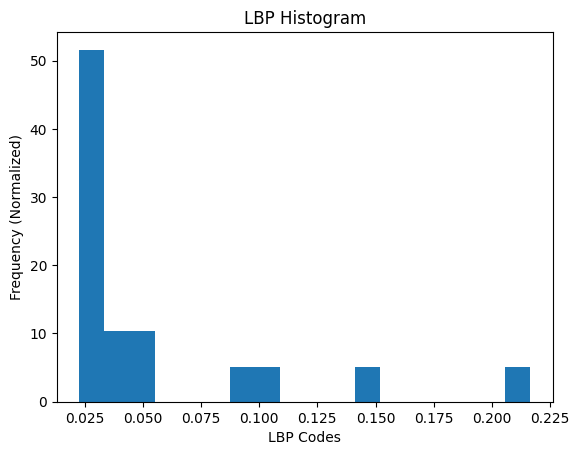

In [33]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(lbp_hist_array, bins=max_lbp_code + 1, density=True)
plt.xlabel('LBP Codes')
plt.ylabel('Frequency (Normalized)')
plt.title('LBP Histogram')
plt.show()

In [34]:
from skimage import io
from skimage.feature import local_binary_pattern
import numpy as np

# 1. 读取和预处理图像
image = io.imread(img_path, as_gray=True)

# 归一化（如果需要）
normalized_image = (255 * (image - image.min()) / (image.max() - image.min())).astype(np.uint8)

# 2. 计算LBP特征
radius = 3
n_points = 8
method = "uniform"
lbp_image = local_binary_pattern(normalized_image, n_points, radius, method)
# 3. LBP特征图现在存储在lbp_image中
lbp_image

array([[2., 2., 2., ..., 2., 2., 3.],
       [2., 3., 3., ..., 3., 3., 3.],
       [4., 4., 4., ..., 2., 2., 0.],
       ...,
       [1., 0., 1., ..., 4., 3., 1.],
       [9., 1., 1., ..., 4., 3., 1.],
       [3., 0., 1., ..., 4., 3., 1.]])

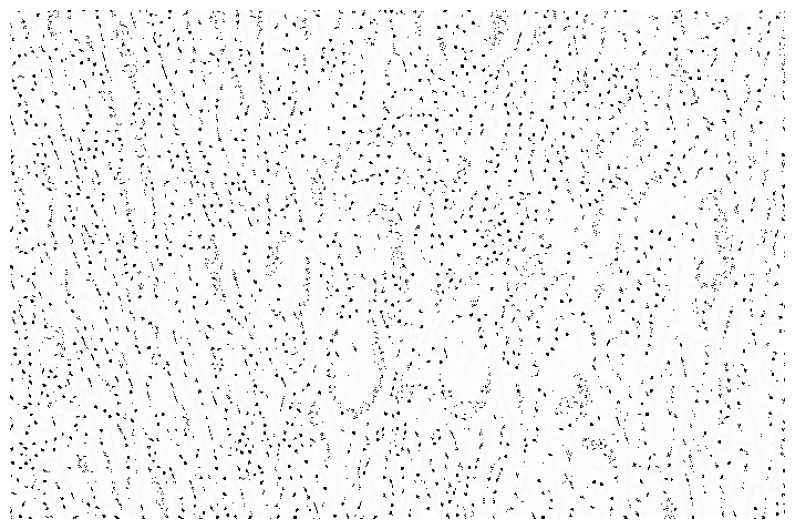

In [35]:
import matplotlib.pyplot as plt

# 假设 lbp_image 是二维的LBP特征图
# 如果LBP码是浮点数，可能需要归一化
if lbp_image.dtype == np.float64:
    lbp_image = (lbp_image * 255).astype(np.uint8)

# 显示LBP图像
plt.figure(figsize=(10, 10))  # 设置图像大小
plt.imshow(lbp_image, cmap='gray')  # 使用灰度显示
plt.axis('off')  # 关闭坐标轴
plt.title('')  # 添加图像标题
plt.show()  # 显示图像

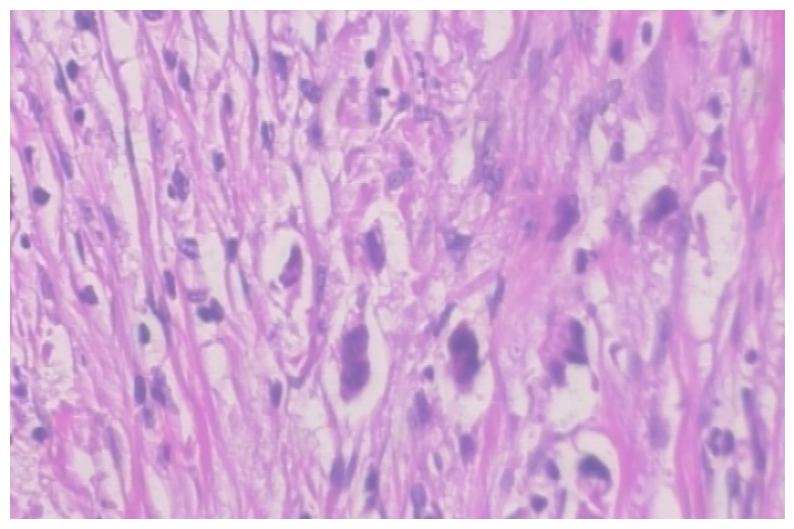

In [36]:
import matplotlib.pyplot as plt
 # 替换为你的图像文件路径

# 读取图像
image = plt.imread(img_path)

# 显示图像
plt.figure(figsize=(10, 10))  # 设置图像大小
plt.imshow(image)  # 显示图像
plt.axis('off')  # 隐藏坐标轴
plt.show()  # 显示图像
